In [1]:

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse
import kvn
from numpy import linalg as LA

colors_ = ["blue", "red", "green", "gray", "black"]

6187
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(30):
    plt.close()


Eigenvalues of A: 
[-0.1+2.j  0. +3.j]

Reference computation

--- refence computation ---
sum psi[RK-max-time]**2: 1.000e+00
Done

LCMI-python computation
Done.


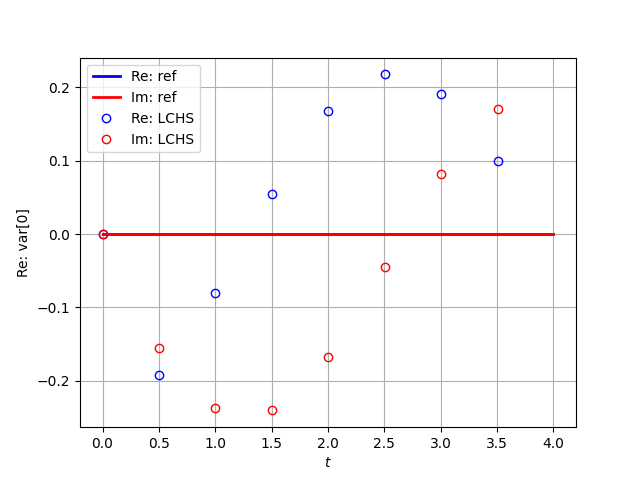

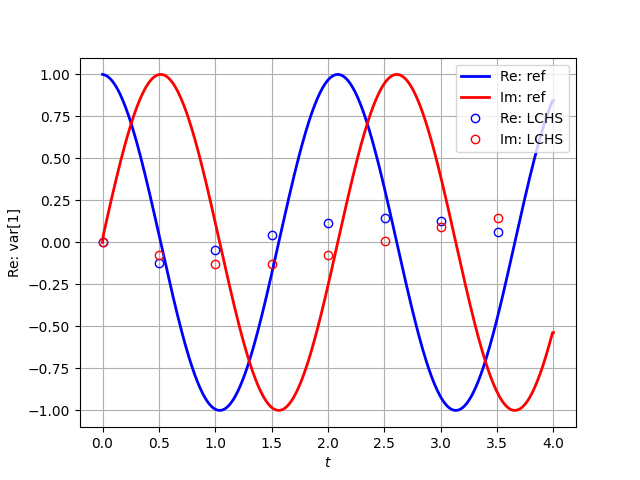

max. abs. err: 1.156e+00


In [31]:
# ---------------------------------------------------
# --- Grid's parameters ---
# ---------------------------------------------------
mix.reload_module(kvn)

sel_case_ = 5

# for correcting a global phase:
nt_          = 9
t_max_       = 4
diff_nt_plot = 6

nk_, k_max_  = 13, 100


# path_save_ = "./jupyter-notebooks/NL/results/"
# path_qucf_ = "../QuCF/simulations/LCHS-TEST-{:d}/kmax-{:d}".format(sel_case_, int(k_max_))
# print("Work directory: {:s}".format(path_qucf_))

# time grid:
Nt_    = 1 << nt_
t_     = np.linspace(0, t_max_, Nt_)
dt_    = np.diff(t_)[0]

diff_N_ = 1 << diff_nt_plot
N_plot  = 1 << (nt_ - diff_nt_plot)

t_plot_ = np.zeros(N_plot)
for it in range(N_plot):
    t_plot_[it] = it * diff_N_ * dt_
del it

# k-grid for the LCHS:
Nk_    = 1 << nk_
k_     = np.linspace(-k_max_, k_max_, Nk_) 

k_temp = np.zeros(Nk_, dtype=complex)
k_temp = k_

dk_    = np.diff(k_)[0]

# initial state:
psi_init_ = kvn.get_initial_state()

# choose the matrix:
# Hi_ = kvn.get_case_Hi(sel_case_)
# A = - Hi_

A = np.diag((2.j-0.1, 3j))


# --- Matrix eigenvalues ---
eigvals, eigvecs = LA.eig(A)
print("\nEigenvalues of A: ")
print(eigvals)

# ------------------------------------------------------------------
# --- Reference computation ---
print()
print("Reference computation")
psi_ref_ = kvn.ref_computation(t_, -A, psi_init_)
print("Done")

# ------------------------------------------------------------------
# --- LCMI-python simulation ---
print()
print("LCMI-python computation")
psi_LCMI_py = np.zeros((N_plot, 2), dtype = complex)
for it in range(1,N_plot):
    id_t = it * diff_N_  
    psi_LCMI_py[it,:] = kvn.LCMI_computation(
        k_, A, psi_init_, t_[id_t]
    )
del id_t, it
print("Done.")

# ------------------------------------------------------------------
# --- Compare the reference and the LCHS-python computations ---
kvn.compare_plots_ref_LCHS_py(t_, t_plot_, psi_ref_, psi_LCMI_py, id_var = 0)
kvn.compare_plots_ref_LCHS_py(t_, t_plot_, psi_ref_, psi_LCMI_py, id_var = 1)
 
max_abs_err = 0
for it in range(len(t_plot_)):
    err = np.max(np.abs(psi_ref_[it * diff_N_] - psi_LCMI_py[it]))
    if max_abs_err < err:
        max_abs_err = err
print("max. abs. err: {:0.3e}".format(max_abs_err))
del max_abs_err, err , it